<a href="https://colab.research.google.com/github/KhyatiMahendru/PCA-on-MNIST/blob/master/PCAonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Implement Principal Component Analysis in Python?

 ### This notebook was developed for my internship at Analytics Vidhya as a part of the study material for their course on Applied Machine Learning in the Advanced Dimensionality Reduction module.
 
 ## What will we do?
 - Train a random forest classifier for digit label prediction on the original dataset
 - Transform the data using PCA
 - Train the same random forest classifier on the transformed data
 - Compare performance before and after PCA

In [0]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [0]:
# fetch data
from sklearn.datasets import fetch_openml
df, target = fetch_openml('mnist_784', version=1, return_X_y=True)

In [0]:
# check shape of data
df.shape

(70000, 784)

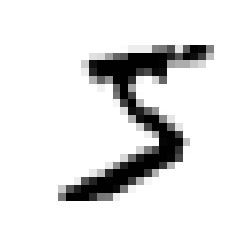

In [0]:
# Display the first image
digit = df[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

In [0]:
# Standardise the data
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

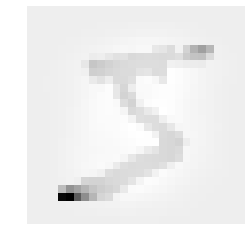

In [0]:
# Display the first image after standardisation
digit_scale = df_scale[0]
digit_scale_image = digit_scale.reshape(28, 28)
plt.imshow(digit_scale_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.axis('off')
plt.show()

In [0]:
# creating the training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(df_scale, target, random_state = 10, test_size = 0.25)

In [0]:
# creating the random forest classification model
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

# Classification without PCA

In [0]:
# fit the classifier
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
# predicting for the original validation set
pred_1 = model.predict(X_valid)

In [0]:
# checking the training performance - Accuracy Score
accuracy_score(model.predict(X_train), y_train)

0.7542095238095238

In [0]:
# checking the validation performance - Accuracy Score
accuracy_score(pred_1, y_valid)

0.7529142857142858

# Classification after PCA

In [0]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train)

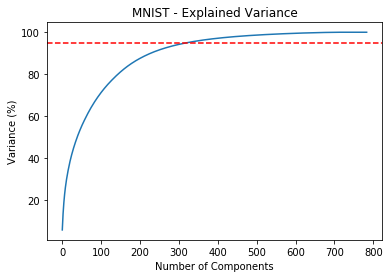

In [0]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('MNIST - Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [0]:
# transforming the original train and validation set to 350 components

# fit on the training data
pca = PCA(350).fit(X_train)

# transform both training and validation data
X_train_transformed = pca.transform(X_train)
X_valid_transformed = pca.transform(X_valid)

In [0]:
# checking shape of data after PCA
X_train_transformed.shape

(52500, 350)

In [0]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
# predicting for the transformed validation set
pred_2 = model.predict(X_valid_transformed)

In [0]:
# checking the training performance after transformat- Accuracy Score
accuracy_score(model.predict(X_train_transformed), y_train)

0.7948

In [0]:
# checking the validation performance - Accuracy Score
accuracy_score(pred_2, y_valid)

0.7853714285714286

# Conclusion

Accuracy of Classification has increased after PCA. This is probably due to elimination of all the unnecessary white-space pixels.